<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_03_2_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 3: Introduction to TensorFlow**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 3 Material

* Part 3.1: Deep Learning and Neural Network Introduction [[Video]](https://www.youtube.com/watch?v=zYnI4iWRmpc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_1_neural_net.ipynb)
* **Part 3.2: Introduction to Tensorflow and Keras** [[Video]](https://www.youtube.com/watch?v=PsE73jk55cE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_2_keras.ipynb)
* Part 3.3: Saving and Loading a Keras Neural Network [[Video]](https://www.youtube.com/watch?v=-9QfbGM1qGw&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_3_save_load.ipynb)
* Part 3.4: Early Stopping in Keras to Prevent Overfitting [[Video]](https://www.youtube.com/watch?v=m1LNunuI2fk&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_4_early_stop.ipynb)
* Part 3.5: Extracting Weights and Manual Calculation [[Video]](https://www.youtube.com/watch?v=7PWgx16kH8s&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_5_weights.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# Part 3.2: Introduction to Tensorflow and Keras

TensorFlow is an open-source software library for machine learning in various kinds of perceptual and language understanding tasks. It is currently used for both research and production by different teams in many commercial Google products, such as speech recognition, Gmail, Google Photos, and search, many of which had previously used its predecessor DistBelief. TensorFlow was originally developed by the Google Brain team for Google's research and production purposes and later released under the Apache 2.0 open source license on November 9, 2015.

* [TensorFlow Homepage](https://www.tensorflow.org/)
* [TensorFlow GitHib](https://github.com/tensorflow/tensorflow)
* [TensorFlow Google Groups Support](https://groups.google.com/forum/#!forum/tensorflow)
* [TensorFlow Google Groups Developer Discussion](https://groups.google.com/a/tensorflow.org/forum/#!forum/discuss)
* [TensorFlow FAQ](https://www.tensorflow.org/resources/faq)


## Why TensorFlow

* Supported by Google
* Works well on Windows, Linux, and Mac
* Excellent GPU support
* Python is an easy to learn programming language
* Python is extremely popular in the data science community

## Deep Learning Tools
TensorFlow is not the only game in town. The biggest competitor to TensorFlow/Keras is PyTorch. Listed below are some of the deep learning toolkits actively being supported:

* **[TensorFlow](https://www.tensorflow.org/)** - Google's deep learning API.  The focus of this class, along with Keras.
* **[Keras](https://keras.io/)** - Also by Google, higher level framework that allows the use of TensorFlow, MXNet and Theano interchangeably.
* **[PyTorch](https://pytorch.org/)** - PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing. It is primarily developed by Facebook's AI Research lab. 

Other deep learning tools:

* **[MXNet](https://mxnet.incubator.apache.org/)** Apache foundation's deep learning API. Can be used through Keras.
* **[Torch](http://torch.ch/)** is used by Google DeepMind, the Facebook AI Research Group, IBM, Yandex and the Idiap Research Institute.  It has been used for some of the most advanced deep learning projects in the world.  However, it requires the [LUA](https://en.wikipedia.org/wiki/Lua_(programming_language))** programming language.  It is very advanced, but it is not mainstream.  I have not worked with Torch (yet!).
* **[PaddlePaddle](https://github.com/baidu/Paddle)** - [Baidu](http://www.baidu.com/)'s deep learning API.
* **[Deeplearning4J](http://deeplearning4j.org/)** - Java based. Supports all major platforms. GPU support in Java!
* **[Computational Network Toolkit (CNTK)](https://github.com/Microsoft/CNTK)** - Microsoft.  Support for Windows/Linux, command line only.  Bindings for predictions for C#/Python. GPU support.
* **[H2O](http://www.h2o.ai/)** - Java based.  Supports all major platforms.  Limited support for computer vision. No GPU support.

In my opinion, the two primary Python libraries for deep learning are PyTorch and Keras. Generally, PyTorch requires more lines of code to perform the deep learning applications presented in this course.  This trait of PyTorch gives Keras an easier learning curve than PyTorch.  However, if you are creating entirely new neural network structures, in a research setting, PyTorch can make for easier access to some of the low-level internals of deep learning.

## Using TensorFlow Directly

Most of the time in the course, we will communicate with TensorFlow using Keras [[Cite:franccois2017deep]](https://www.manning.com/books/deep-learning-with-python), which allows you to specify the number of hidden layers and create the neural network.  TensorFlow is a low-level mathematics API, similar to [Numpy](http://www.numpy.org/).  However, unlike Numpy, TensorFlow is built for deep learning. TensorFlow compiles these compute graphs into highly efficient C++/[CUDA](https://en.wikipedia.org/wiki/CUDA) code.

### TensorFlow Linear Algebra Examples

TensorFlow is a library for linear algebra.  Keras is a higher-level abstraction for neural networks that you build upon TensorFlow.  In this section, I will demonstrate some basic linear algebra that employs TensorFlow directly and does not make use of Keras.  First, we will see how to multiply a row and column matrix.

In [1]:
import tensorflow as tf

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

print(product)
print(float(product))

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)
12.0


This example multiplied two TensorFlow constant tensors.  Next, we will see how to subtract a constant from a variable.

In [2]:
import tensorflow as tf

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# Add an op to subtract 'a' from 'x'.  Run it and print the result
sub = tf.subtract(x, a)
print(sub)
print(sub.numpy())
# ==> [-2. -1.]

tf.Tensor([-2. -1.], shape=(2,), dtype=float32)
[-2. -1.]


Of course, variables are only useful if their values can be changed.  The program can accomplish this change in value by calling the assign function.

In [5]:
x.assign([4.0, 6.0])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([4., 6.], dtype=float32)>

The program can now perform the subtraction with this new value.

In [6]:
sub = tf.subtract(x, a)
print(sub)
print(sub.numpy())

tf.Tensor([1. 3.], shape=(2,), dtype=float32)
[1. 3.]


In the next section, we will see a TensorFlow example that has nothing to do with neural networks.

### TensorFlow Mandelbrot Set Example

Next, we examine another example where we use TensorFlow directly.  To demonstrate that TensorFlow is mathematical and does not only provide neural networks, we will also first use it for a non-machine learning rendering task. The code presented here is capable of rendering a [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set). Note, I based this example on a Mandelbrot example that I found [here]( https://chromium.googlesource.com/external/github.com/tensorflow/tensorflow/+/r0.10/tensorflow/g3doc/tutorials/mandelbrot/index.md). I've updated the code slightly to comply with current versions of TensorFlow.

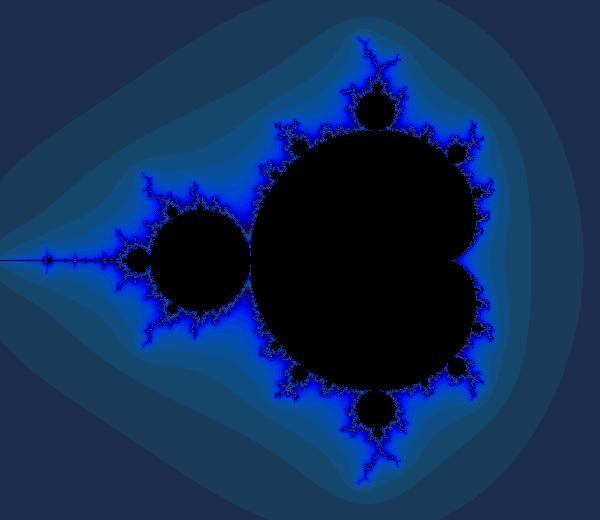

In [8]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))



# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
for i in range(200):
    # Compute the new values of z: z^2 + x
    zs_ = zs*zs + xs

    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4

    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    
DisplayFractal(ns.numpy())

Mandlebrot render is both simple and infinitely complex at the same time. This view shows the entire Mandlebrot universe at the same time, as it is completely zoomed out. However, if you zoom in on any non-black portion of the plot, you will find infinite hidden complexity. 

### Introduction to Keras

[Keras](https://keras.io/) is a layer on top of Tensorflow that makes it much easier to create neural networks.  Rather than define the graphs, as you see above, you set the individual layers of the network with a much more high-level API.  Unless you are performing research into entirely new structures of deep neural networks, it is unlikely that you need to program TensorFlow directly.  

**For this class, we will use usually use TensorFlow through Keras, rather than direct TensorFlow**

### Simple TensorFlow Regression: MPG

This example shows how to encode the MPG dataset for regression.  This dataset is slightly more complicated than Iris, because:

* Input has both numeric and categorical
* Input has missing values

This example uses functions defined above in this notepad, the "helpful functions". These functions allow you to build the feature vector for a neural network. Consider the following:

* Predictors/Inputs 
    * Fill any missing inputs with the median for that column.  Use **missing_median**.
    * Encode textual/categorical values with **encode_text_dummy**.
    * Encode numeric values with **encode_numeric_zscore**.
* Output
    * Discard rows with missing outputs.
    * Encode textual/categorical values with **encode_text_index**.
    * Do not encode output numeric values.
* Produce final feature vectors (x) and expected output (y) with **to_xy**.

To encode categorical values that are part of the feature vector, use the functions from above if the categorical value is the target (as was the case with Iris, use the same technique as Iris). The iris technique allows you to decode back to Iris text strings from the predictions.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Train on 398 samples
Epoch 1/100
398/398 - 0s - loss: 532928.3769
Epoch 2/100
398/398 - 0s - loss: 253903.1740
Epoch 3/100
398/398 - 0s - loss: 100463.9936
Epoch 4/100
398/398 - 0s - loss: 39376.4139
Epoch 5/100
398/398 - 0s - loss: 14699.5505
Epoch 6/100
398/398 - 0s - loss: 10070.2764
Epoch 7/100
398/398 - 0s - loss: 8767.4534
Epoch 8/100
398/398 - 0s - loss: 7568.0651
Epoch 9/100
398/398 - 0s - loss: 6519.3935
Epoch 10/100
398/398 - 0s - loss: 5638.3222
Epoch 11/100
398/398 - 0s - loss: 4900.6222
Epoch 12/100
398/398 - 0s - loss: 4256.2369
Epoch 13/100
398/398 - 0s - loss: 3715.3158
Epoch 14/100
398/398 - 0s - loss: 3243.3127
Epoch 15/100
398/398 - 0s - loss: 2837.4957
Epoch 16/100
398/398 - 0s - loss: 2493.2320
Epoch 17/100
398/398 - 0s - loss: 2191.6368
Epoch 18/100
398/398 - 0s - loss: 1935.9826
Epoch 19/100
398/398 - 0s - loss: 1709.9219
Epoch 20/100
398/398 - 0s - loss: 1517.5594
Epoch 21/100
398/398 - 0s - loss: 1347.0029
Epoch 22/100
398/398 - 0s - loss: 1202.3976
Epoch 23/10

### Introduction to Neural Network Hyperparameters

If you look at the above code, you will see that the neural network contains four layers.  The first layer is the input layer because it contains the **input_dim** parameter that the programmer sets to be the number of inputs that the dataset has.  The network needs one input neuron for every column in the data set (including dummy variables).  

There are also several hidden layers, with 25 and 10 neurons each. You might be wondering how the programmer chose these numbers. Selecting a hidden neuron structure is one of the most common questions about neural networks.  Unfortunately, there is not a right answer.  These are hyperparameters.  They are settings that can affect neural network performance, yet there are not a clearly defined means of setting them.

In general, more hidden neurons mean more capability to fit complex problems.  However, too many neurons can lead to overfitting and lengthy training times.  Too few can lead to underfitting the problem and will sacrifice accuracy.  Also, how many layers you have is another hyperparameter.  In general, more layers allow the neural network to be able to perform more of its feature engineering and data preprocessing.  But this also comes at the expense of training times and the risk of overfitting.  In general, you will see that neuron counts start larger near the input layer and tend to shrink towards the output layer in a sort of triangular fashion. 

Some techniques use machine learning to optimize these values.  These will be discussed in [Module 8.3](t81_558_class_08_3_keras_hyperparameters.ipynb).

### Controlling the Amount of Output

The program produces one line of output for each training epoch.  You can eliminate this output by setting the verbose setting of the fit command:

* **verbose=0** - No progress output (use with Jupyter if you do not want output)
* **verbose=1** - Display progress bar, does not work well with Jupyter
* **verbose=2** - Summary progress output (use with Jupyter if you want to know the loss at each epoch)

### Regression Prediction

Next, we will perform actual predictions.  The program assigns these predictions to the **pred** variable. These are all MPG predictions from the neural network.  Notice that this is a 2D array?  You can always see the dimensions of what Keras returns by printing out **pred.shape**.  Neural networks can return multiple values, so the result is always an array.  Here the neural network only returns one value per prediction (there are 398 cars, so 398 predictions).  However, a 2D range is needed because the neural network has the potential of returning more than one value.   

In [9]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: (398, 1)
[[23.08987 ]
 [23.776747]
 [22.190557]
 [22.24273 ]
 [22.536469]
 [27.865118]
 [27.486967]
 [27.316473]
 [27.953611]
 [24.391483]]


We would like to see how good these predictions are.  We know what the correct MPG is for each car, so we can measure how close the neural network was.

In [10]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 13.157274080377979


The number printed above is the average amount that the predictions were above or below the expected output. We can also print out the first ten cars, with predictions and actual MPG.

In [11]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Car name: {cars[i]}, MPG: {y[i]}, " 
          + "predicted MPG: {pred[i]}")

1. Car name: chevrolet chevelle malibu, MPG: 18.0, predicted MPG: {pred[i]}
2. Car name: buick skylark 320, MPG: 15.0, predicted MPG: {pred[i]}
3. Car name: plymouth satellite, MPG: 18.0, predicted MPG: {pred[i]}
4. Car name: amc rebel sst, MPG: 16.0, predicted MPG: {pred[i]}
5. Car name: ford torino, MPG: 17.0, predicted MPG: {pred[i]}
6. Car name: ford galaxie 500, MPG: 15.0, predicted MPG: {pred[i]}
7. Car name: chevrolet impala, MPG: 14.0, predicted MPG: {pred[i]}
8. Car name: plymouth fury iii, MPG: 14.0, predicted MPG: {pred[i]}
9. Car name: pontiac catalina, MPG: 14.0, predicted MPG: {pred[i]}
10. Car name: amc ambassador dpl, MPG: 15.0, predicted MPG: {pred[i]}


### Simple TensorFlow Classification: Iris

Classification is the process by which a neural network attempts to classify the input into one or more classes.  The simplest way of evaluating a classification network is to track the percentage of training set items that were classified incorrectly.  We typically score human results in this manner. For example, you might have taken multiple-choice exams in school in which you had to shade in a bubble for choices A, B, C, or D.  If you chose the wrong letter on a 10-question exam, you would earn a 90%.  In the same way, we can grade computers; however, most classification algorithms do not merely choose A, B, C, or D.  Computers typically report a classification as their percent confidence in each class.  Figure 3.EXAM shows how a computer and a human might both respond to question number 1 on an exam.

**Figure 3.EXAM: Classification Neural Network Output**
![Classification Neural Network Output](images/class-multi-choice.png "Classification Neural Network Output")

As you can see, the human test taker marked the first question as "B." However, the computer test taker had an 80% (0.8) confidence in "B" and was also somewhat sure with 10% (0.1) on "A." The computer then distributed the remaining points on the other two.  In the simplest sense, the machine would get 80% of the score for this question if the correct answer were "B." The computer would get only 5% (0.05) of the points if the correct answer were "D." 

What we just saw is a straightforward example of how to perform the Iris classification using TensorFlow.  The iris.csv file is used, rather than using the built-in data that many of the Google examples require.  

**Make sure that you always run previous code blocks.  If you run the code block below, without the code block above, you will get errors**

In [12]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", 
    na_values=['NA', '?'])

# Convert to numpy - Classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species']) # Classification
species = dummies.columns
y = dummies.values


# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Train on 150 samples
Epoch 1/100
150/150 - 0s - loss: 1.1343
Epoch 2/100
150/150 - 0s - loss: 1.0067
Epoch 3/100
150/150 - 0s - loss: 0.9150
Epoch 4/100
150/150 - 0s - loss: 0.8430
Epoch 5/100
150/150 - 0s - loss: 0.7892
Epoch 6/100
150/150 - 0s - loss: 0.7348
Epoch 7/100
150/150 - 0s - loss: 0.6847
Epoch 8/100
150/150 - 0s - loss: 0.6382
Epoch 9/100
150/150 - 0s - loss: 0.6041
Epoch 10/100
150/150 - 0s - loss: 0.5686
Epoch 11/100
150/150 - 0s - loss: 0.5374
Epoch 12/100
150/150 - 0s - loss: 0.5166
Epoch 13/100
150/150 - 0s - loss: 0.4913
Epoch 14/100
150/150 - 0s - loss: 0.4706
Epoch 15/100
150/150 - 0s - loss: 0.4519
Epoch 16/100
150/150 - 0s - loss: 0.4337
Epoch 17/100
150/150 - 0s - loss: 0.4207
Epoch 18/100
150/150 - 0s - loss: 0.4026
Epoch 19/100
150/150 - 0s - loss: 0.3894
Epoch 20/100
150/150 - 0s - loss: 0.3764
Epoch 21/100
150/150 - 0s - loss: 0.3630
Epoch 22/100
150/150 - 0s - loss: 0.3527
Epoch 23/100
150/150 - 0s - loss: 0.3409
Epoch 24/100
150/150 - 0s - loss: 0.3296
Epoc

In [13]:
# Print out number of species found:

print(species)

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


Now that you have a neural network training, we would like to be able to use it. The following code makes use of our neural network. Exactly like before, we will generate predictions.  Notice that three values come back for each of the 150 iris flowers.  There were three types of iris (Iris-setosa, Iris-versicolor, and Iris-virginica).  

In [14]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: (150, 3)
[[9.98257935e-01 1.74211117e-03 1.47250105e-08]
 [9.94762123e-01 5.23775769e-03 9.35751956e-08]
 [9.97034669e-01 2.96533993e-03 5.68744980e-08]
 [9.94459629e-01 5.54029271e-03 1.55113412e-07]
 [9.98531222e-01 1.46873493e-03 1.33291875e-08]
 [9.98098075e-01 1.90198515e-03 1.37531018e-08]
 [9.96991158e-01 3.00874189e-03 7.64488419e-08]
 [9.97346044e-01 2.65395525e-03 3.05425694e-08]
 [9.92665589e-01 7.33401440e-03 3.12981911e-07]
 [9.95905280e-01 4.09475202e-03 5.66798697e-08]]


If you would like to turn of scientific notation, the following line can be used:

In [15]:
np.set_printoptions(suppress=True)

Now we see these values rounded up.

In [16]:
print(y[0:10])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


Usually, the program considers the column with the highest prediction to be the prediction of the neural network.  It is easy to convert the predictions to the expected iris species.  The argmax function finds the index of the maximum prediction for each row.

In [17]:
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {expected_classes}")

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Expected: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Of course, it is straightforward to turn these indexes back into iris species. We use the species list that we created earlier.

In [18]:
print(species[predict_classes[1:10]])

Index(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'],
      dtype='object')


Accuracy might be a more easily understood error metric.  It is essentially a test score.  For all of the iris predictions, what percent were correct?  The downside is it does not consider how confident the neural network was in each prediction.

In [19]:
from sklearn.metrics import accuracy_score

correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.9733333333333334


The code below performs two ad hoc predictions.  The first prediction is simply a single iris flower, and the second predicts two iris flowers.  Notice that the argmax in the second prediction requires **axis=1**?  Since we have a 2D array now, we must specify which axis to take the argmax over.  The value **axis=1** specifies we want the max column index for each row.

In [20]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred)
print(f"Predict that {sample_flower} is: {species[pred]}")

[[0.00208851 0.19842853 0.799483  ]]
Predict that [[5. 3. 4. 2.]] is: Iris-virginica


You can also predict two sample flowers.

In [21]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]],\
        dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred,axis=1)
print(f"Predict that these two flowers {sample_flower} ")
print(f"are: {species[pred]}")

[[0.00208851 0.19842838 0.79948306]
 [0.9900221  0.00997756 0.00000035]]
Predict that these two flowers [[5.  3.  4.  2. ]
 [5.2 3.5 1.5 0.8]] 
are: Index(['Iris-virginica', 'Iris-setosa'], dtype='object')
